# Imports

In [1]:
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)

## Directories etc.

In [2]:
data_save_path = "C:/Users/maria/MEGAsync/SLCNdata/Meta/all_data"
plot_save_path = "C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots"
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path)

# Get data

In [3]:
all_data = pd.read_csv(os.path.join(data_save_path, 'all_data.csv'), index_col=0)
all_data_z = pd.read_csv(os.path.join(data_save_path, 'all_data_z.csv'), index_col=0)
all_data_long = pd.read_csv(os.path.join(data_save_path, 'all_data_long.csv'), index_col=0)
all_data_long_z = pd.read_csv(os.path.join(data_save_path, 'all_data_long_z.csv'), index_col=0)

# Descriptives

## Sample age distribution

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 5 x 3 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_AgegroupHistogram.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_bin : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_bin : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


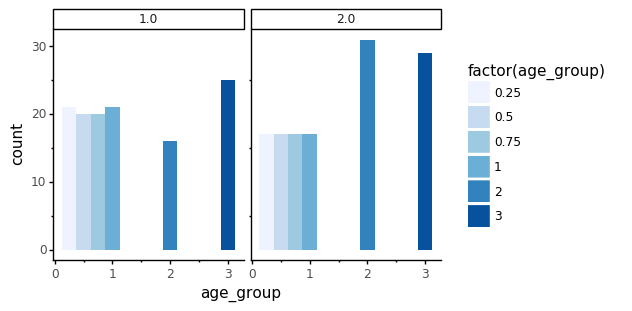

<ggplot: (-9223371912708841770)>

In [4]:
gg.options.figure_size = (5, 3)
g = (gg.ggplot(all_data, gg.aes('age_group', fill='factor(age_group)'))
 + gg.stat_bin(binwidth=0.25)
 + gg.facet_grid('~ Gender')
 + gg.scale_fill_brewer()
)
g.save(os.path.join(plot_save_path, '0_AgegroupHistogram.png'))
g

## Distributions of all features

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 20 x 20 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_FeatureDistributions.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


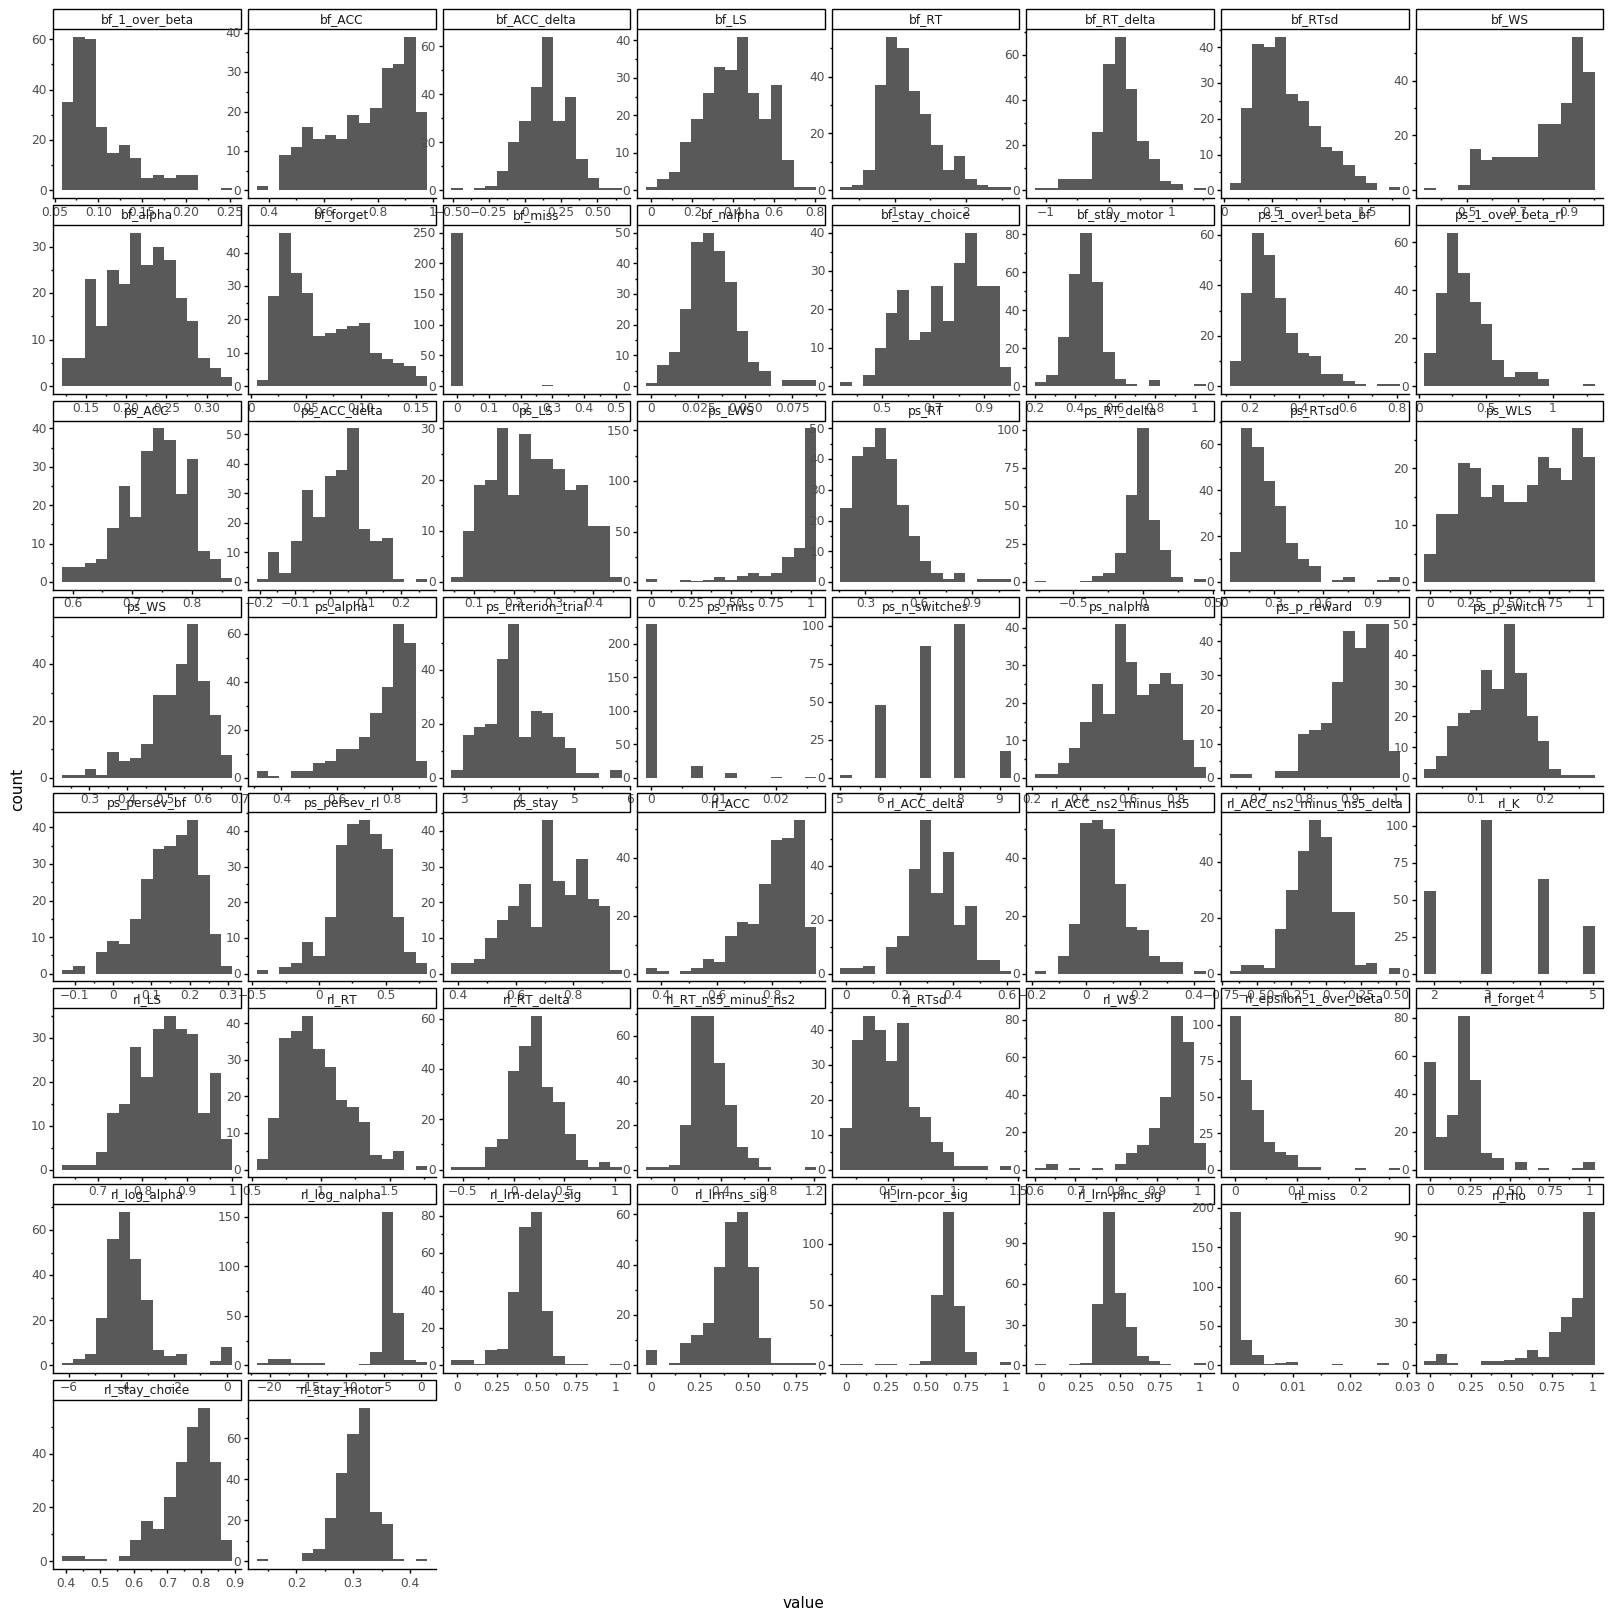

<ggplot: (124146289300)>


In [5]:
gg.options.figure_size = (20, 20)

g = (gg.ggplot(all_data_long, gg.aes('value'))
     + gg.geom_histogram(bins=15)
     + gg.facet_wrap('~ feature', scales='free')
    )
g.save(os.path.join(plot_save_path, '0_FeatureDistributions.png'))
print(g)

C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
  from_inches(height, units), units), PlotnineWarning)
C:\Users\maria\Anaconda3\envs\PYMC3\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/SLCN/MetaSLCNPlots\0_FeatureMeans.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


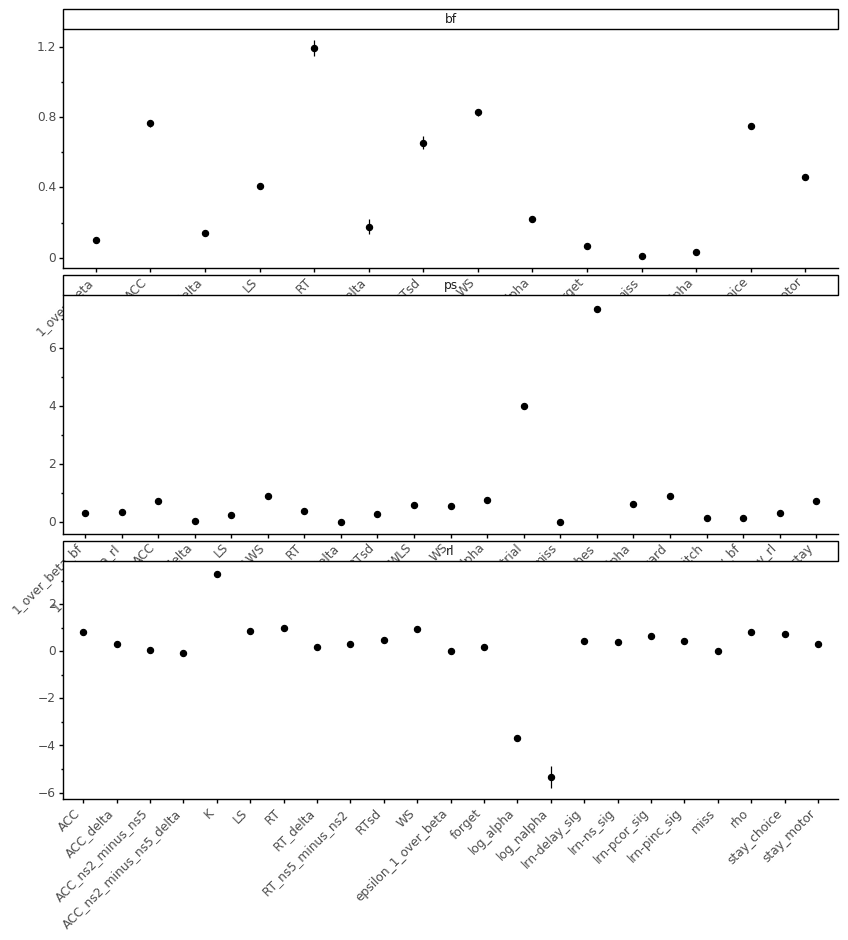

<ggplot: (-9223371912704024639)>

In [6]:
# Mean of each feature
gg.options.figure_size = (10, 10)
g = (gg.ggplot(all_data_long, gg.aes('param', 'value'))
     + gg.stat_summary()
     + gg.labs(x='', y='')
     + gg.theme(axis_text_x=gg.element_text(rotation=45, hjust=1))
     + gg.facet_wrap('~ task', scales='free', ncol=1)
    )
g.save(os.path.join(plot_save_path, '0_FeatureMeans.png'))
g